In [125]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

In [67]:
df_original = pd.read_csv('titles.csv')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

df = df_original.copy()
df.info()
df.isnull().sum()
df['genres'] = df['genres'].str.strip("[]").str.replace("'", "")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

<Axes: xlabel='release_year'>

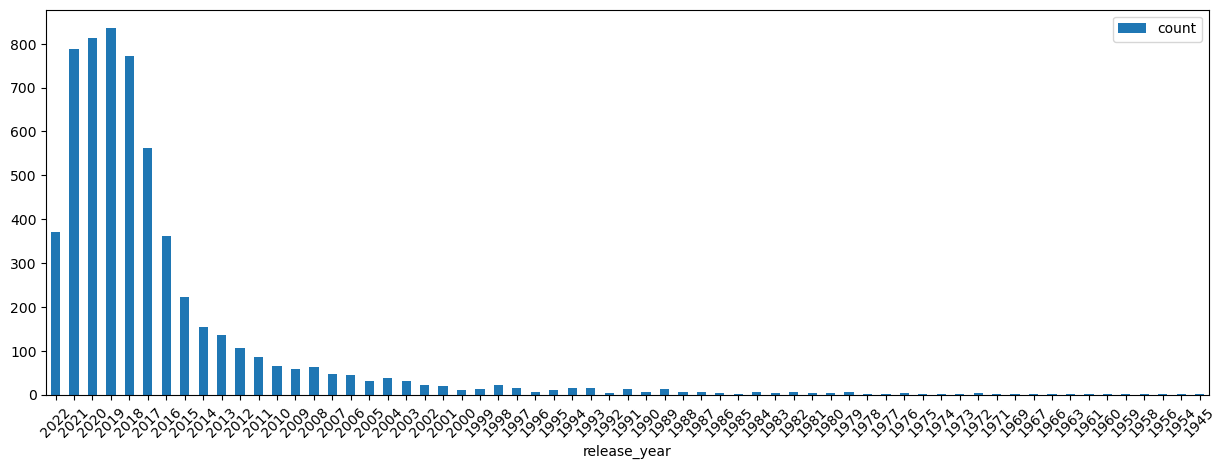

In [68]:

dfp = df['release_year'].value_counts().reset_index()
dfp.head()
dfp.sort_values('release_year',ascending = False).plot.bar(x='release_year', y='count', rot=45, figsize=(15,5))



In [69]:
#Based on the above plot, we can see that the most movies and TV- shows were produced from 2015 to 2022. 
#Therefore our data analysis will be based on movies and TV-shows released from 201 onwards
df_1522=df[df['release_year']>=2015]
df_1522.shape
df_1522['release_year'].unique()

array([2015, 2016, 2018, 2017, 2019, 2020, 2022, 2021], dtype=int64)

In [70]:
df_credits = pd.read_csv('credits.csv')

In [71]:
#Merge the two csv files on column id, as we are interested in the role column contained in df_credits
df_compo=pd.merge(df_1522,df_credits, how = 'left', on =['id'] )

directors = df_credits[df_credits['role']=='DIRECTOR']
directors.shape

df_compo=pd.merge(df_1522,directors, how = 'left', on =['id'] )
df_compo.shape
df_compo['id'].unique()
df_compo.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts8,Better Call Saul,SHOW,Six years before Saul Goodman meets Walter Whi...,2015,TV-MA,49,"drama, crime",['US'],6.0,tt3032476,8.8,438575.0,273.296,8.500,NaN,NaN,NaN,NaN
1,ts37143,Alone,SHOW,Hardcore survivalists are put by themselves in...,2015,TV-MA,51,"reality, documentation",['US'],9.0,tt4803766,8.4,5037.0,26.930,7.000,NaN,NaN,NaN,NaN
2,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,61,"scifi, thriller, drama, fantasy, horror",['US'],5.0,tt4574334,8.7,1101055.0,2226.231,8.635,NaN,NaN,NaN,NaN
3,ts21867,Schitt's Creek,SHOW,Formerly filthy rich video store magnate Johnn...,2015,TV-14,22,comedy,['CA'],6.0,tt3526078,8.5,115758.0,25.254,7.600,NaN,NaN,NaN,NaN
4,ts41766,The Good Place,SHOW,"Eleanor Shellstrop, an ordinary woman who, thr...",2016,TV-14,23,"scifi, romance, comedy, drama, fantasy",['US'],4.0,tt4955642,8.2,152884.0,33.793,8.000,NaN,NaN,NaN,NaN


In [74]:
df.sort_values('imdb_score', ascending=False).head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2658,ts265844,#ABtalks,SHOW,#ABtalks is a YouTube interview show hosted by...,2018,TV-PG,68,,[],1.0,tt12635254,9.6,7.0,NaN,NaN
216,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"drama, crime, thriller",['US'],5.0,tt0903747,9.5,1775990.0,353.848,8.79
564,ts160526,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,19,reality,[],11.0,tt3062514,9.5,3115.0,NaN,NaN
3147,ts85398,Our Planet,SHOW,Experience our planet's natural beauty and exa...,2019,TV-G,50,documentation,['GB'],1.0,tt9253866,9.3,42259.0,19.942,8.80
233,ts3371,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,"scifi, animation, action, family, fantasy",['US'],3.0,tt0417299,9.3,303666.0,56.915,8.70


In [75]:
#Find the top 5 most frequent genres on Netflix platform from 2015 onwards

genres_top5produced=df_compo['genres'].value_counts(ascending=False).head(5)
genres_top5produced.reset_index()

,genres,count
0,comedy,467
1,documentation,358
2,drama,279
3,"comedy, drama",126
4,"drama, romance",123


<Axes: title={'center': 'Top 5 most frequent genres since 2015'}, xlabel='genres'>

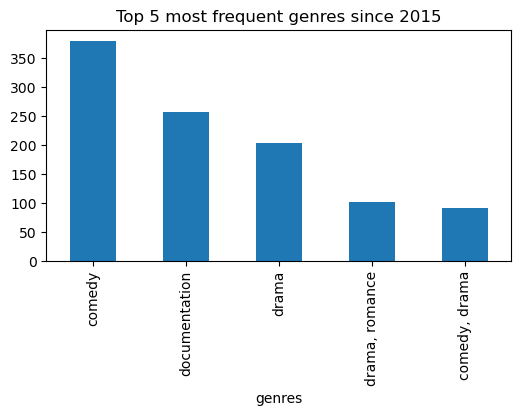

In [180]:
top5_produced=df_compo['genres'].value_counts().head(5)
top5_produced
plt.figure(figsize = (6,3))
top5_produced.plot(kind = 'bar', title = 'Top 5 most frequent genres since 2015')

In [116]:
#Genre popularity by IMDB Score

most_popular_genres = df_compo.groupby('genres')['imdb_score'].mean().sort_values(ascending=False)
type(most_popular_genres)


pandas.core.series.Series

In [118]:
imdb8=pd.DataFrame(most_popular_genres).head(10)
imdb8

,imdb_score
genres,
"scifi, action, drama, animation, fantasy",9.0
"action, drama, thriller, romance, comedy, fantasy, horror",8.8
"animation, action, drama, war, history",8.8
"scifi, action, animation, horror, fantasy, thriller",8.7
"drama, comedy, animation",8.7
"comedy, drama, music, reality",8.7
"scifi, crime, drama, thriller",8.7
"action, animation, comedy, fantasy, scifi, horror, drama",8.7
"drama, history, romance, war, action",8.7


In [119]:
imdb8=imdb8[imdb8['imdb_score']>=8]
imdb8


,imdb_score
genres,
"scifi, action, drama, animation, fantasy",9.0
"action, drama, thriller, romance, comedy, fantasy, horror",8.8
"animation, action, drama, war, history",8.8
"scifi, action, animation, horror, fantasy, thriller",8.7
"drama, comedy, animation",8.7
"comedy, drama, music, reality",8.7
"scifi, crime, drama, thriller",8.7
"action, animation, comedy, fantasy, scifi, horror, drama",8.7
"drama, history, romance, war, action",8.7


In [140]:
#Percentation of Netflix Titles that are either Movies or TV Shows/Netflix sources distribution

prod_show = df_compo[df_compo['type'] =='SHOW'].count()
prod_show=df_compo[df_compo['type']=='SHOW']
prod_show['id'].count()

1954

In [141]:
prod_movie = df_compo[df_compo['type'] =='MOVIE'].count()
prod_movie=df_compo[df_compo['type']=='MOVIE']
prod_movie['id'].count()

3216

<Axes: ylabel='count'>

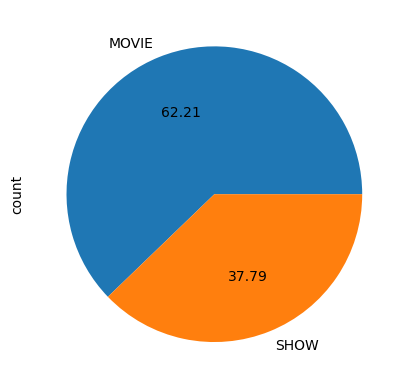

In [143]:
df_compo['type'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
#So there are 3216 movies and 1954 TV shows, with movies being the majority. 
#There are far more movie titles (62,21%) that TV shows titles (37,79%) in terms of title.

In [145]:
imdb_type = df_compo.groupby('type')['imdb_score'].mean().sort_values(ascending=False)
imdb_type


type
SHOW     6.924409
MOVIE    6.149639
Name: imdb_score, dtype: float64

In [154]:
df_compo.head(30)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts8,Better Call Saul,SHOW,Six years before Saul Goodman meets Walter Whi...,2015,TV-MA,49,"drama, crime",['US'],6.0,tt3032476,8.8,438575.0,273.296,8.500,NaN,NaN,NaN,NaN
1,ts37143,Alone,SHOW,Hardcore survivalists are put by themselves in...,2015,TV-MA,51,"reality, documentation",['US'],9.0,tt4803766,8.4,5037.0,26.930,7.000,NaN,NaN,NaN,NaN
2,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,61,"scifi, thriller, drama, fantasy, horror",['US'],5.0,tt4574334,8.7,1101055.0,2226.231,8.635,NaN,NaN,NaN,NaN
3,ts21867,Schitt's Creek,SHOW,Formerly filthy rich video store magnate Johnn...,2015,TV-14,22,comedy,['CA'],6.0,tt3526078,8.5,115758.0,25.254,7.600,NaN,NaN,NaN,NaN
4,ts41766,The Good Place,SHOW,"Eleanor Shellstrop, an ordinary woman who, thr...",2016,TV-14,23,"scifi, romance, comedy, drama, fantasy",['US'],4.0,tt4955642,8.2,152884.0,33.793,8.000,NaN,NaN,NaN,NaN
5,ts37539,One-Punch Man,SHOW,Saitama is a hero who only became a hero for f...,2015,TV-PG,22,"action, animation, comedy, fantasy, scifi, hor...",['JP'],2.0,tt4508902,8.7,152231.0,133.336,8.400,NaN,NaN,NaN,NaN
6,tm232579,Hunt for the Wilderpeople,MOVIE,Ricky is a defiant young city kid who finds hi...,2016,PG-13,101,"drama, comedy",['NZ'],NaN,tt4698684,7.8,128676.0,11.591,7.700,20352.0,Taika Waititi,NaN,DIRECTOR
7,ts36577,The Last Kingdom,SHOW,A show of heroic deeds and epic battles with a...,2015,TV-MA,55,"action, drama, war, history, european",['GB'],5.0,tt4179452,8.5,132561.0,153.281,8.300,NaN,NaN,NaN,NaN
8,ts35201,Food Wars! Shokugeki no Soma,SHOW,Yukihira Souma's dream is to become a full-tim...,2015,TV-MA,24,"drama, comedy, fantasy, thriller, animation",['JP'],5.0,tt4731072,8.2,10022.0,28.642,8.600,NaN,NaN,NaN,NaN
9,tm243100,Hell or High Water,MOVIE,A divorced dad and his ex-con brother resort t...,2016,R,102,"thriller, western, action, crime, drama",['US'],NaN,tt2582782,7.6,227350.0,28.227,7.303,20859.0,David Mackenzie,NaN,DIRECTOR


In [209]:
#Top 10 Director based on the imdb score.
rate_directors = df_compo.dropna(subset = 'role').sort_values(by=['imdb_score', 'name'], ascending=False)
rate_directors[['name', 'imdb_score']].head(10)
top10_directors = rate_directors[['name', 'imdb_score', 'title', 'type']].head(10)
top10_directors

,name,imdb_score,title,type
141,Shin Won-ho,9.2,Reply 1988,SHOW
3957,Sashi Kiran Tikka,9.1,Major,MOVIE
2101,Jason Hehir,9.1,The Last Dance,SHOW
1542,Venkatesh Maha,8.9,C/o Kancharapalem,MOVIE
2316,Keith Scholey,8.9,David Attenborough: A Life on Our Planet,MOVIE
2317,Jonathan Hughes,8.9,David Attenborough: A Life on Our Planet,MOVIE
2318,Alastair Fothergill,8.9,David Attenborough: A Life on Our Planet,MOVIE
2257,Steve Cheng,8.8,The Untamed,SHOW
2256,Ka-Lam Chan,8.8,The Untamed,SHOW
4524,Han Dong-hwa,8.8,Navillera,SHOW


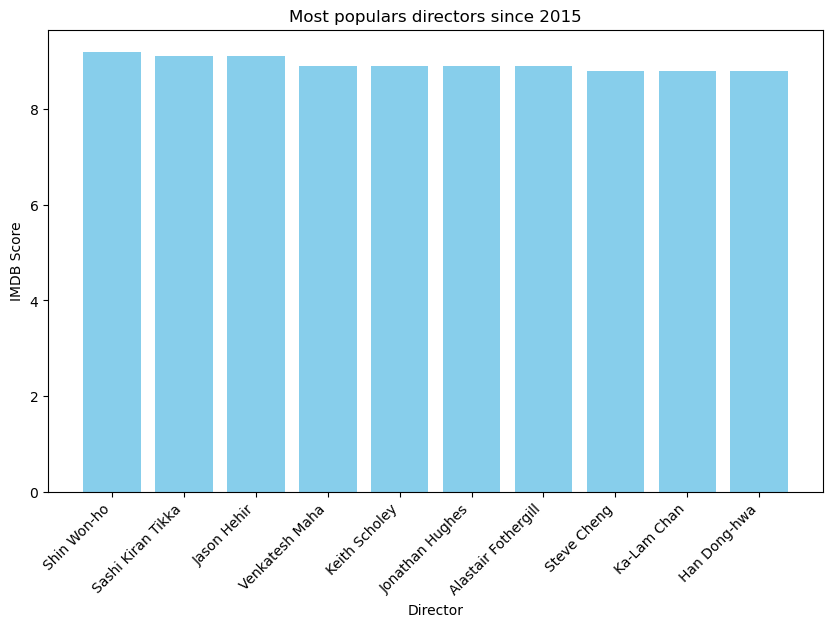

In [178]:
plt.figure(figsize=(10, 6))
plt.bar(top10_directors['name'], top10_directors['imdb_score'], color='skyblue')
plt.xlabel('Director')
plt.ylabel('IMDB Score')
plt.title('Most populars directors since 2015')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#The most popular directors on Netflix, are mainly international.

In [199]:
#What are the top 10 movies based on IMDB score with the highest 'runtime'? 
df_temp=prod_movie.groupby('title').mean(['imdb_score']).sort_values('runtime', ascending=False).head(10).reset_index()
df_temp.head(10)


,title,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
0,The Irishman,2019.0,209.0,NaN,7.8,376379.0,21.075,7.600,3308.0
1,Jab Harry Met Sejal,2017.0,200.0,NaN,5.0,20593.0,8.529,6.500,53156.0
2,The Hateful Eight,2015.0,188.0,NaN,7.8,570138.0,26.531,7.737,2266.0
3,RRR,2022.0,187.0,NaN,8.0,87515.0,53.526,7.800,45443.0
4,Manu,2018.0,182.0,NaN,7.6,1081.0,1.400,7.000,957377.0
5,This Earth of Mankind,2019.0,181.0,NaN,6.8,747.0,2.346,7.300,66049.0
6,Jagga Jasoos,2017.0,180.0,NaN,6.3,10283.0,6.005,6.000,202602.0
7,Zero,2018.0,180.0,NaN,5.2,27346.0,6.890,5.300,124579.0
8,How I Fell in Love with a Gangster,2022.0,179.0,NaN,6.0,2248.0,29.595,6.700,1122250.0
9,Super Deluxe,2019.0,176.0,NaN,8.4,13680.0,7.084,7.800,139152.0


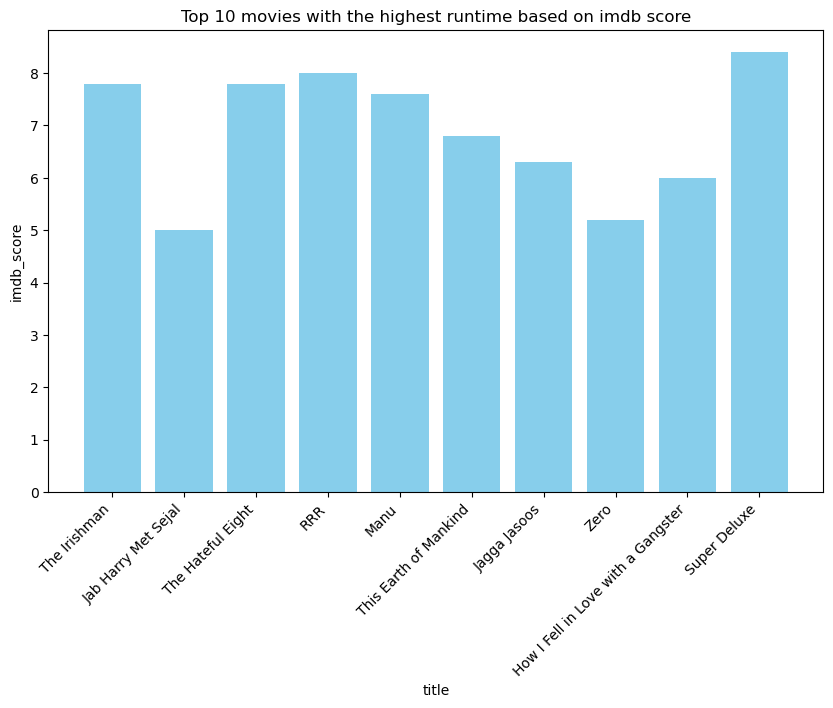

In [198]:
plt.figure(figsize=(10, 6))
plt.bar(df_temp['title'], df_temp['imdb_score'], color='skyblue')
plt.xlabel('title')
plt.ylabel('imdb_score')
plt.title('Top 10 movies with the highest runtime based on imdb score')
plt.xticks(rotation=45, ha='right')
plt.show()

# we can see that the movies with a runtime of about 180 minutes have an imdb score between 6.5 and 8, therefore Neftlix may need to invest in creating movies
#with less than 180 minutes runtime

In [211]:
#What are the top 10 movies based on IMDB score with the highest 'runtime'? 
df_temp=prod_movie.groupby('title').mean(['imdb_score']).sort_values('imdb_score', ascending=False).head(10).reset_index()
df_temp

,title,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
0,Major,2022.0,149.0,NaN,9.1,7576.0,6.429,8.188,937765.0
1,C/o Kancharapalem,2018.0,152.0,NaN,8.9,6842.0,2.145,7.600,951125.0
2,David Attenborough: A Life on Our Planet,2020.0,83.0,NaN,8.9,31625.0,15.935,8.500,488599.0
3,Bo Burnham: Inside,2021.0,87.0,NaN,8.7,44074.0,11.434,8.200,308.0
4,"Best Wishes, Warmest Regards: A Schitt's Creek...",2020.0,44.0,NaN,8.6,1445.0,3.016,8.900,1396414.0
5,In Our Mothers' Gardens,2021.0,84.0,NaN,8.6,132.0,2.079,NaN,1904729.0
6,The Art of Incarceration,2019.0,90.0,NaN,8.6,25.0,0.664,NaN,2418135.0
7,Merku Thodarchi Malai,2018.0,122.0,NaN,8.6,1818.0,2.158,7.400,230796.0
8,A Second Chance,2015.0,130.0,NaN,8.6,47.0,2.752,7.100,141692.0
9,Springsteen On Broadway,2018.0,153.0,NaN,8.5,2199.0,4.117,8.000,175889.0


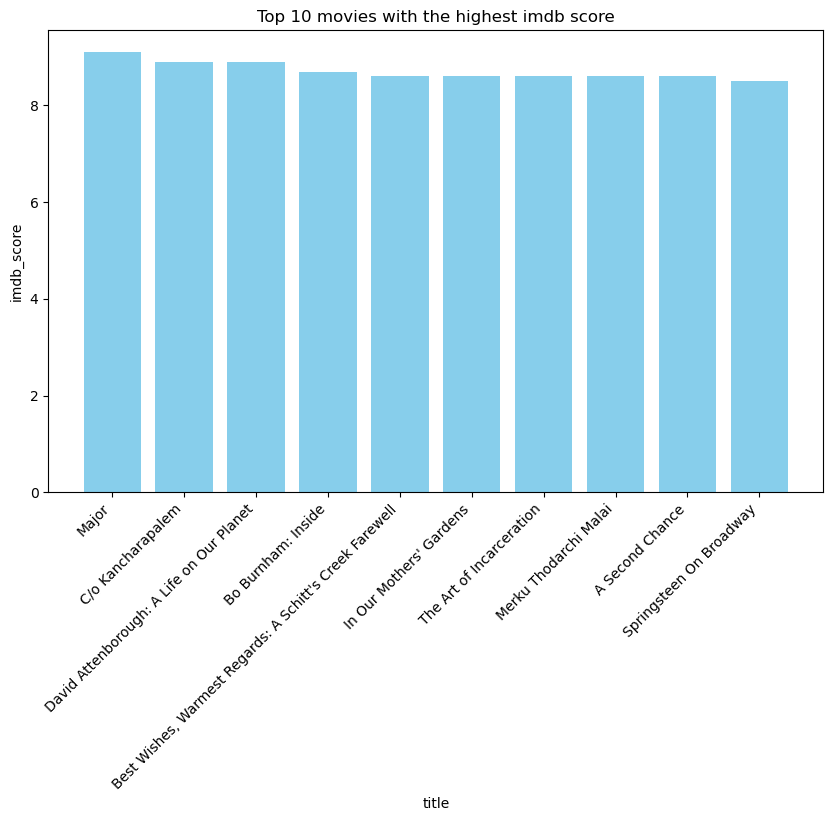

In [205]:
plt.figure(figsize=(10, 6))
plt.bar(df_temp['title'], df_temp['imdb_score'], color='skyblue')
plt.xlabel('title')
plt.ylabel('imdb_score')
plt.title('Top 10 movies with the highest imdb score')
plt.xticks(rotation=45, ha='right')
plt.show()

#The below bar plot shows the top 10 movies by imdb score 

In [ ]:
"""Conclusions

The most content type on Netflix is movies.
The popular streaming platform started gaining traction after 2015. Since then, the amount of content added has been increasing significantly.
The most popular director on Netflix , with titles that have the highest mean imdb score,are international; Shin Won-ho for TV-shows and Sashi Kiran Tikka for movies.
International Movies is a genre that is mostly in Netflix."""
